Oi Alan,

Sou a Lara e fico feliz em revisar o seu projeto hoje.

Quando eu identificar um erro pela primeira vez, eu irei apenas apontá-lo. Vou deixar que você identifique e conserte o erro, pois estou buscando te preparar para trabalhar como um Cientista de Dados. Em um cenário real, a sua liderança faria o mesmo. Caso você não consiga encontrar o erro, vou dar dicas mais precisas na próxima revisão.

Meus comentários serão neste formato abaixo, **por favor, não mova, edite ou apague os comentários**.

Eles serão em caixas verdes, amarelas ou vermelhas, conforme abaixo:

<div class="alert alert-block alert-success">
<b>Comentário da Revisora</b> <a class="tocSkip"></a>
    
Sucesso! Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora</b> <a class="tocSkip"></a>
    
Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário da Revisora</b> <a class="tocSkip"></a>
Precisa de correção. É necessário fazer algumas correções para que o projeto seja aceito.
</div>

Você pode me responder usando este bloco:

<div class="alert alert-block alert-info">
<b>Resposta do estudante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">

<b>Oi Lara. Obrigado pela revisão e feedback. </b> <a class="tocSkip"></a>
    
Adicionei mais alguns gráficos além do que você havia proposto e fiz alguns comentários e adicionei mais alguma 
</div>

# MEGALINE TELECOM

Objetivo do estudo: verificar quais dos planos oferecidos (Surf e Ultimate) gera mais receita afim de ajustar o orçamento de publicidade.

    Descrição dos planos:
        - chamadas contadas em minutos e arredondadas para cima (1seg = 1min)
        - trafego web: contados em GB e total mensal é arredondado para cima (1024MB = 2GB) 

    1 - Plano Surf:
        - preço mensal: 20,0
        - 500 minutos mensais, 50 mensagens de texto e 15GB de dados
        - após:
            - 1 minuto: 3 centavos
            - 1 mensagem: 3 centavos
            - 1GB dados: 10,0
        
    2 - Plano Ultimate
        - preço mensal: 70,0
        - 3000 minutos mensais, 1000 mensagens de texto e 30GB de dados
        - após:
            - 1 minuto: 1 centavos
            - 1 mensagem: 1 centavos
            - 1GB dados: 7,0
            
            

 - Amostra: 500 clientes
 - Alpha: a criterio



<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso, você adicionou uma introdução detalhada.
</div>

## Início

### Carregando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns

### Carregando base de dados

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso, a importação dos dados e das bibliotecas está separada.

</div>

## Explorando os dados

### Base de dados 'calls'

#### Informações gerais/resumidas

In [3]:
#Informações
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
#Descrição geral
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


#### Verificando valores ausentes  e duplicados no conjunto de dados

In [5]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [6]:
calls.duplicated().sum()

0

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Aqui a checagem das duplicatas não ficou registrada, recomendo deixar a verificação antes de usar o drop.
</div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (revisão 2)</b> <a class="tocSkip"></a>
    
Sucesso!   
    
</div>

#### Amostragem da base de dados

In [7]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


#### Corrigindo o tipo de dado

   Pelas informações gerais/resumidas, precebe-se que existem campos na base de dados com o tipo errado (call_date). Sendo assim, é necessário a transformação do tipo de dado e separar o mês da data

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

In [9]:
calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
5,1000_388,1000,2018-12-31,2.20,12
6,1000_510,1000,2018-12-27,5.75,12
7,1000_521,1000,2018-12-28,14.18,12
8,1000_530,1000,2018-12-28,5.77,12
9,1000_544,1000,2018-12-26,4.40,12


Pelas informações acima, verifica-se a quantidade de chamadas por cada usuário ('user_id') nos meses identificados na respectiva coluna.

In [10]:
#Arredondando para cima os valores da coluna 'duration' na base de dados 'calls'
calls['duration'] = calls['duration'].apply(np.ceil)

In [11]:
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 2)</b> <a class="tocSkip"></a>
    
Código da revisora abaixo, só para ajudar a exemplificar o gráfico por mês:
    `calls_copy = calls.copy()`
</div>

In [12]:
#revisora adicionando uma cópia de calls por mês.
calls_copy = calls.copy()

In [13]:
#Agrupando as chamadas por usuário e mês e somando as durações
calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id':'count'})
calls.reset_index(inplace=True)


In [14]:
calls.rename(columns = {'id': 'calls_count'},inplace = True)
calls.reset_index(inplace=True)

In [15]:
calls_new = calls.copy()
calls_new.head()

,index,user_id,month,duration,calls_count
0,0,1000,12,124.0,16
1,1,1001,8,182.0,27
2,2,1001,9,315.0,49
3,3,1001,10,393.0,65
4,4,1001,11,426.0,64


In [16]:
#Verificando linhas com valores 0
calls[(calls['duration'] == 0)].shape[0] / calls.shape[0]*100

0.08857395925597875

 - Verifica-se que  menos 1% dos dados da coluna 'duration' são dados com valores 0 (zero), ou seja, ligações não completadas. 

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

#### Deletando as linhas com valores 0

In [17]:
calls.drop(calls_new.loc[calls_new['duration'] == 0].index, inplace = True)

In [18]:
calls.describe()

,index,user_id,month,duration,calls_count
count,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,1128.478723,1247.172872,9.166223,436.324025,61.051418
std,651.908408,143.331973,2.496531,231.711444,31.735478
min,0.000000,1000.000000,1.000000,2.000000,1.000000
25%,564.750000,1122.000000,8.000000,275.000000,39.000000
50%,1128.500000,1246.000000,10.000000,429.000000,60.000000
75%,1692.250000,1370.000000,11.000000,575.250000,80.000000
max,2257.000000,1499.000000,12.000000,1510.000000,205.000000


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

### Base de dados 'internet'

#### Informações gerais/resumidas

In [19]:
#Informações
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
#Descrição geral
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


#### Verificando valores ausentes e duplicados

In [21]:
internet.drop_duplicates(keep = 'first', inplace = True)

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Aqui seria ideal registrar quantas duplicatas encontrou, caso tenha identificado, antes de apagar.
</div>

#### Amostragem da base de dados

In [22]:
internet.head(30)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


#### Corrigindo o tipo de dados

   Pelas informações gerais/resumidas, precebe-se que existem campos na base de dados com o tipo errado (session_date). Sendo assim, é necessário a transformação do tipo de dado.

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

In [24]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


Pelas informações acima, verifica-se a quantidade de dados por cada usuário ('user_id') nos meses identificados na respectiva coluna.

In [25]:
#Agrupando o consumo de dados por usuário e mês e somando as durações
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
internet.reset_index(inplace=True)

In [26]:
internet_copy = internet

In [27]:
internet.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [28]:
#Verificando linhas com valores 0
internet[(internet['mb_used'] == 0)].shape[0] / internet.shape[0]*100

0.0

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

#### Deletando as linhas com valores 0

In [29]:
internet.drop(internet.loc[internet['mb_used'] == 0].index, inplace = True)

In [30]:
internet.describe()

,user_id,month,mb_used
count,2277.000000,2277.000000,2277.000000
mean,1244.925780,9.177866,16882.197501
std,142.544823,2.497183,7869.784848
min,1000.000000,1.000000,92.310000
25%,1121.000000,8.000000,12347.720000
50%,1243.000000,10.000000,16873.740000
75%,1367.000000,11.000000,21041.520000
max,1499.000000,12.000000,70931.590000


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

### Base de dados 'messages'

#### Informações gerais/resumidas

In [31]:
#Informações
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
#Descrição geral
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


#### Verificando valores ausentes e duplicados

In [33]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [34]:
messages.duplicated().sum()

0

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>

Aqui também, sugiro registrar quantas duplicatas identificou, antes de apagar.
</div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (revisão 2)</b> <a class="tocSkip"></a>
    
Sucesso!   
    
</div>

In [35]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


#### Amostragem da base de dados

In [36]:
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

#### Corrigindo o tipo de dados

   Pelas informações gerais/resumidas, precebe-se que existe campos na base de dados com o tipo errado (message_date). Sendo assim, é necessário a transformação do tipo de dado e separar o mês da data.

In [37]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

In [38]:
messages.head(20)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


In [39]:
#Agrupando o consumo de mensagens por usuário e mês e somando as durações
messages = messages.groupby(['user_id','month']).agg({'id':'count'})

#Renomeando a coluna
messages.rename(columns = {'id': 'messages_count'},inplace = True)
messages.reset_index(inplace=True)

In [40]:
messages_copy = messages

In [41]:
messages.head()

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


Pelas informações acima, verifica-se a quantidade de mensagens por cada usuário ('user_id') nos meses identificados na respectiva coluna.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso, você adicionou conclusões intermediárias.
</div>

### Base de dados 'plans'

#### Informações gerais/resumidas

In [42]:
#Informações
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [43]:
#Descrição geral
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


#### Verificando valores ausentes e duplicados e alterando o nome das colunas

In [44]:
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [45]:
#Alterando o nome da coluna 'plan_name'
plans.rename(columns = {'plan_name': 'plan'}, inplace = True)

In [46]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

### Base de dados 'users'

#### Informações gerais/resumidas

In [47]:
#Informações
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [48]:
#Descrição geral
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


#### Verificando valores ausentes e duplicados

In [49]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [50]:
users.duplicated().sum()

0

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
A mesma dica vale aqui, é importante para você manter uma visão de quantas duplicatas deletou, essa contagem das duplicatas. Pode ser feito usando o `duplicated().sum()`.
</div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (revisão 2)</b> <a class="tocSkip"></a>
    
Sucesso!   
    
</div>

In [51]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


#### Amostragem da base de dados

In [52]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

#### Corrigindo o tipo de dados

   Pelas informações gerais/resumidas, precebe-se que existem campos na base de dados com o tipo errado (reg_date, churn_date). Sendo assim, é necessário a transformação do tipo de dado.

In [53]:
#Alterando as colunas 'reg_date' e 'churn_date'para datetime
users[['reg_date','churn_date']] =users[['reg_date','churn_date']].apply(pd.to_datetime)

#Separando o mês da data 'reg_date' e criando um nova coluna 'ini_month'
users['ini_month'] = users['reg_date'].dt.month

#Separando o mês da data 'churn_date' e criando um nova coluna 'ini_month'
users['final_month'] = users['churn_date'].dt.month

In [54]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,ini_month,final_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


Tomando como premissa de que o conjunto de dados foi gerado no final de 2018, ou seja em 31/12/2018

In [55]:
#Transformando tipo date_time para numérico
users['final_month'] = pd.to_numeric(users['final_month'], downcast ='signed')

#Substituindo NaN com 12 (mês de fechamento do onjunto de dados)
users['final_month'].fillna(12, inplace=True)
users[['ini_month','final_month']] =users[['ini_month','final_month']].apply(pd.to_numeric)

In [56]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,ini_month,final_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,12.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,12.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,12.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,12.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,12.0


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

In [57]:
#Calculando a vigência do plano
users['duration_plan_month'] = (users['final_month'] - users['ini_month']) + 1

In [58]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,ini_month,final_month,duration_plan_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,12.0,1.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,12.0,5.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,12.0,3.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,12.0,12.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,12.0,8.0


Como foi assumido que o conjunto de dados foi gerado no final de 2018, a análise será feita pela vigência do plano do usuário (diferença entre os meses das colunas ini_month e final_month). Tomaremos como premissa também que o usuário já tenha que pagar uma parcela do plano logo no inicio da vigência.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso.
</div>

In [59]:
#Reorganiando o conjunto de dados
users = users.drop(columns=['reg_date', 'churn_date','ini_month','final_month'])

In [60]:
users.head(10)

,user_id,first_name,last_name,age,city,plan,duration_plan_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,5.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,3.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",surf,12.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",surf,2.0
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,2.0
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",surf,6.0
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,5.0
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,9.0


#### Separando por Estado/Distrito

Como posteriormente será necessário uma análise por região, opto-se por criar uma nova coluna somente com essa informação

In [61]:
#Separando a informação 'state_district' da coluna 'city' e reorganizando as colunas

users['state_district'] = users['city'].apply(lambda city: city.split(',')[1].split(' MSA')[0].strip())
users = users[['user_id','first_name','last_name','age','city','state_district','plan','duration_plan_month']]
users = users.drop('city', axis=1)

In [62]:
users.head()

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0
4,1004,Leonila,Thompson,40,WA,surf,8.0


In [63]:
users['state_district'].isnull().sum()

0

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

## Preparando os dados

Com o intuito de facilitar a análise, as bases de dados serão unificadas, ou seja, agrupar na base de dados 'users' as informações já tratadas das demais bases.

### Dados da base 'calls'

A próxima etapa na análise será feita na base de dados 'calls', que será verificado e tratados os seguintes campos:
    
   - número de chamadas e soma de minutos utilizados no mês

#### Unificando as bases de dados e criando novas colunas

In [64]:
#Criando novo dataframe 'users_all' com agrupamento e calculando a media da coluna 'duration' por 'user_id'
users_all = pd.merge(users, calls.groupby('user_id')['duration'].mean(), on = 'user_id', how = 'left')

In [65]:
users_all.head()

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,duration
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000


In [66]:
#Agrupando e contando as chamadas por usuário
users_all = pd.merge(users_all, calls.groupby('user_id')['calls_count'].sum(), on = 'user_id', how = 'left')

In [67]:
users_all.head()

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,duration,calls_count
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0


In [68]:
#Renomeando as colunas
users_all.rename(columns = {'duration':'call_duration_month'}, inplace = True)

In [69]:
users_all.head()

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0


In [70]:
# Calculando a diferença de minutos utilizados em relação ao plano 'Surf' e 'Ultimate' e criando a coluna 'minutes_diff'

users_all['minutes_included'] = users_all['plan'].map(plans.set_index('plan')['minutes_included'])
users_all['minutes_diff'] = (users_all['call_duration_month'] - users_all['minutes_included']).apply(lambda x: max(x, 0))

In [71]:
users_all.head()

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,minutes_diff
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,0.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,0.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,0.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,604.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,0.0


In [72]:
#Calculando o valor a ser pago pelos minutos excedidos

users_all['usd_per_min'] = users_all['plan'].map(plans.set_index('plan')['usd_per_minute'])
users_all['usd_min_exceed_month'] = users_all['minutes_diff'] * users_all['usd_per_min']

In [73]:
users_all.head(20)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,minutes_diff,usd_per_min,usd_min_exceed_month
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,0.000000,0.01,0.000000
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,0.000000,0.03,0.000000
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,0.000000,0.03,0.000000
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,604.000000,0.03,18.120000
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,0.000000,0.03,0.000000
5,1005,Livia,Shields,31,TX,surf,2.0,496.000000,59.0,500,0.000000,0.03,0.000000
6,1006,Jesusa,Bradford,73,CA,ultimate,2.0,34.500000,11.0,3000,0.000000,0.01,0.000000
7,1007,Eusebio,Welch,42,MI,surf,6.0,528.200000,380.0,500,28.200000,0.03,0.846000
8,1008,Emely,Hoffman,53,FL,ultimate,5.0,518.666667,219.0,3000,0.000000,0.01,0.000000
9,1009,Gerry,Little,19,CA,surf,9.0,744.250000,856.0,500,244.250000,0.03,7.327500


Após calcular os valores a serem pagos pelas chamadas excedidas e criação das novas colunas, percebeu-se valores nulos na base de dados

In [74]:
#Verficando os valores nulos
users_all.isna().sum()

user_id                  0
first_name               0
last_name                0
age                      0
state_district           0
plan                     0
duration_plan_month      0
call_duration_month     19
calls_count             19
minutes_included         0
minutes_diff            19
usd_per_min              0
usd_min_exceed_month    19
dtype: int64

Verifica-se que as colunas 'call_duration_month', 'call_count_month' e 'minutes_diff' estão com valores nulos. Possivelmente são clientes que não fizeram ligações. 

In [75]:
#Substituindo os valores NaN por 0
users_all['call_duration_month'] = users_all['call_duration_month'].fillna(0)
users_all['calls_count'] = users_all['calls_count'].fillna(0)
users_all['minutes_diff'] = users_all['minutes_diff'].fillna(0)
users_all['usd_min_exceed_month'] = users_all['usd_min_exceed_month'].fillna(0)
users_all.isna().sum()

user_id                 0
first_name              0
last_name               0
age                     0
state_district          0
plan                    0
duration_plan_month     0
call_duration_month     0
calls_count             0
minutes_included        0
minutes_diff            0
usd_per_min             0
usd_min_exceed_month    0
dtype: int64

In [76]:
users_all.head(2)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,minutes_diff,usd_per_min,usd_min_exceed_month
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.0,16.0,3000,0.0,0.01,0.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.6,261.0,500,0.0,0.03,0.0


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

### Dados da base 'internet'

A próxima etapa na análise será feita na base de dados 'internet', que será verificado e tratados os seguintes campos:
    
   - soma o tráfego total e arredonda para cima ao final do mês  (1025MB = 2GB)

In [77]:
#Criando a coluna 'gb_month' e calculando o tráfego de dados de cada usuário (convertendo para GB) com arredondamento para cima
#Inserindo as informações na base de dados 'users'

users_all = pd.merge(users_all, internet.groupby('user_id')['mb_used'].mean() /1024, on = 'user_id', how = 'left')
users_all['mb_used'] = users_all['mb_used'].apply(np.ceil)
users_all.rename(columns = {'mb_used': 'gb_month'}, inplace = True)

In [78]:
users_all.head(10)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,minutes_diff,usd_per_min,usd_min_exceed_month,gb_month
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,0.00,0.01,0.0000,2.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,0.00,0.03,0.0000,16.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,0.00,0.03,0.0000,14.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,604.00,0.03,18.1200,27.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,0.00,0.03,0.0000,20.0
5,1005,Livia,Shields,31,TX,surf,2.0,496.000000,59.0,500,0.00,0.03,0.0000,17.0
6,1006,Jesusa,Bradford,73,CA,ultimate,2.0,34.500000,11.0,3000,0.00,0.01,0.0000,17.0
7,1007,Eusebio,Welch,42,MI,surf,6.0,528.200000,380.0,500,28.20,0.03,0.8460,29.0
8,1008,Emely,Hoffman,53,FL,ultimate,5.0,518.666667,219.0,3000,0.00,0.01,0.0000,19.0
9,1009,Gerry,Little,19,CA,surf,9.0,744.250000,856.0,500,244.25,0.03,7.3275,23.0


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

#### Unificando as bases de dados e criando novas colunas

In [79]:
# Calculando a diferença de dados utilizados em relação ao plano 'Surf' e 'Ultimate' e criando a coluna 'gb_diff'

users_all['gb_included'] = users_all['plan'].map(plans.set_index('plan')['mb_per_month_included']/1024)

In [80]:
users_all['gb_diff'] = (users_all['gb_month'] - users_all['gb_included']).apply(lambda x: max(x, 0))

In [81]:
users_all.head()

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,minutes_diff,usd_per_min,usd_min_exceed_month,gb_month,gb_included,gb_diff
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,0.0,0.01,0.00,2.0,30.0,0.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,0.0,0.03,0.00,16.0,15.0,1.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,0.0,0.03,0.00,14.0,15.0,0.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,604.0,0.03,18.12,27.0,15.0,12.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,0.0,0.03,0.00,20.0,15.0,5.0


In [82]:
#Calculando o valor a ser pago pelo tráfego de dados excedido

users_all['usd_per_gb'] = users_all['plan'].map(plans.set_index('plan')['usd_per_gb'])
users_all['usd_gb_exceed_month'] = users_all['gb_diff'] * users_all['usd_per_gb']

In [83]:
users_all.head(30)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,minutes_diff,usd_per_min,usd_min_exceed_month,gb_month,gb_included,gb_diff,usd_per_gb,usd_gb_exceed_month
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,0.000000,0.01,0.000000,2.0,30.0,0.0,7,0.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,0.000000,0.03,0.000000,16.0,15.0,1.0,10,10.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,0.000000,0.03,0.000000,14.0,15.0,0.0,10,0.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,604.000000,0.03,18.120000,27.0,15.0,12.0,10,120.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,0.000000,0.03,0.000000,20.0,15.0,5.0,10,50.0
5,1005,Livia,Shields,31,TX,surf,2.0,496.000000,59.0,500,0.000000,0.03,0.000000,17.0,15.0,2.0,10,20.0
6,1006,Jesusa,Bradford,73,CA,ultimate,2.0,34.500000,11.0,3000,0.000000,0.01,0.000000,17.0,30.0,0.0,7,0.0
7,1007,Eusebio,Welch,42,MI,surf,6.0,528.200000,380.0,500,28.200000,0.03,0.846000,29.0,15.0,14.0,10,140.0
8,1008,Emely,Hoffman,53,FL,ultimate,5.0,518.666667,219.0,3000,0.000000,0.01,0.000000,19.0,30.0,0.0,7,0.0
9,1009,Gerry,Little,19,CA,surf,9.0,744.250000,856.0,500,244.250000,0.03,7.327500,23.0,15.0,8.0,10,80.0


Após calcular os valores a serem pagos pelo tráfego de dados excedido e criação das novas colunas, percebeu-se valores nulos na base de dados.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

In [84]:
#Verficando os valores nulos
users_all.isna().sum()

user_id                  0
first_name               0
last_name                0
age                      0
state_district           0
plan                     0
duration_plan_month      0
call_duration_month      0
calls_count              0
minutes_included         0
minutes_diff             0
usd_per_min              0
usd_min_exceed_month     0
gb_month                11
gb_included              0
gb_diff                 11
usd_per_gb               0
usd_gb_exceed_month     11
dtype: int64

Verifica-se que as colunas 'gb_month', 'gb_diff' e 'usd_gb_exceed_month' estão com valores nulos. Possivelmente são clientes que não utilizaram internet. 

In [85]:
#Substituindo os valores NaN por 0
users_all['gb_month'] = users_all['gb_month'].fillna(0)
users_all['gb_diff'] = users_all['gb_diff'].fillna(0)
users_all['usd_gb_exceed_month'] = users_all['usd_gb_exceed_month'].fillna(0)
users_all.isna().sum()

user_id                 0
first_name              0
last_name               0
age                     0
state_district          0
plan                    0
duration_plan_month     0
call_duration_month     0
calls_count             0
minutes_included        0
minutes_diff            0
usd_per_min             0
usd_min_exceed_month    0
gb_month                0
gb_included             0
gb_diff                 0
usd_per_gb              0
usd_gb_exceed_month     0
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

### Dados da base 'messages'

Nesta etapa a análise será feita na base de dados 'messages', onde será feito a soma de todas as mensagens no período de um mês de cada usuário

In [86]:
messages.head()

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [87]:
#Criando a coluna 'messages_month' de cada usuário e inserindo as informações na base de dados 'users'
users_all = pd.merge(users_all, messages.groupby('user_id')['messages_count'].sum(), on = 'user_id', how = 'left')

In [88]:
users_all.head(10)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,minutes_diff,usd_per_min,usd_min_exceed_month,gb_month,gb_included,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_count
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,0.00,0.01,0.0000,2.0,30.0,0.0,7,0.0,11.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,0.00,0.03,0.0000,16.0,15.0,1.0,10,10.0,207.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,0.00,0.03,0.0000,14.0,15.0,0.0,10,0.0,88.0
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,604.00,0.03,18.1200,27.0,15.0,12.0,10,120.0,50.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,0.00,0.03,0.0000,20.0,15.0,5.0,10,50.0,177.0
5,1005,Livia,Shields,31,TX,surf,2.0,496.000000,59.0,500,0.00,0.03,0.0000,17.0,15.0,2.0,10,20.0,11.0
6,1006,Jesusa,Bradford,73,CA,ultimate,2.0,34.500000,11.0,3000,0.00,0.01,0.0000,17.0,30.0,0.0,7,0.0,154.0
7,1007,Eusebio,Welch,42,MI,surf,6.0,528.200000,380.0,500,28.20,0.03,0.8460,29.0,15.0,14.0,10,140.0,255.0
8,1008,Emely,Hoffman,53,FL,ultimate,5.0,518.666667,219.0,3000,0.00,0.01,0.0000,19.0,30.0,0.0,7,0.0,84.0
9,1009,Gerry,Little,19,CA,surf,9.0,744.250000,856.0,500,244.25,0.03,7.3275,23.0,15.0,8.0,10,80.0,NaN


#### Unificando as bases de dados e criando novas colunas

In [89]:
# Calculando a diferença de dados utilizados em relação ao plano 'Surf' e 'Ultimate' e criando a coluna 'messages_diff'

users_all['messages_included'] = users_all['plan'].map(plans.set_index('plan')['messages_included'])
users_all['messages_diff'] = (users_all['messages_count'] - users_all['messages_included']).apply(lambda x: max(x, 0))

In [90]:
users_all.head(20).sort_values(by='messages_diff', ascending=False)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,...,usd_per_min,usd_min_exceed_month,gb_month,gb_included,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_count,messages_included,messages_diff
7,1007,Eusebio,Welch,42,MI,surf,6.0,528.200000,380.0,500,...,0.03,0.846000,29.0,15.0,14.0,10,140.0,255.0,50,205.0
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,...,0.03,0.000000,16.0,15.0,1.0,10,10.0,207.0,50,157.0
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,...,0.03,0.000000,20.0,15.0,5.0,10,50.0,177.0,50,127.0
19,1019,Shizue,Landry,34,FL,surf,12.0,255.500000,66.0,500,...,0.03,0.000000,16.0,15.0,1.0,10,10.0,152.0,50,102.0
17,1017,Boris,Gates,61,DC-VA-MD-WV,surf,5.0,336.200000,266.0,500,...,0.03,0.000000,19.0,15.0,4.0,10,40.0,152.0,50,102.0
16,1016,Jann,Salinas,30,CA,surf,3.0,553.000000,228.0,500,...,0.03,1.590000,20.0,15.0,5.0,10,50.0,95.0,50,45.0
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,...,0.03,0.000000,14.0,15.0,0.0,10,0.0,88.0,50,38.0
14,1014,Edmundo,Simon,61,NY-NJ-PA,surf,2.0,638.500000,178.0,500,...,0.03,4.155000,5.0,15.0,0.0,10,0.0,73.0,50,23.0
15,1015,Beata,Carpenter,26,PA,surf,1.0,96.000000,16.0,500,...,0.03,0.000000,18.0,15.0,3.0,10,30.0,68.0,50,18.0
18,1018,Dennis,Grimes,70,IN,surf,3.0,432.000000,182.0,500,...,0.03,0.000000,14.0,15.0,0.0,10,0.0,16.0,50,0.0


In [91]:
#Calculando o valor a ser pago pelas quantidade de mensagens excedidas

users_all['usd_per_message'] = users_all['plan'].map(plans.set_index('plan')['usd_per_message'])
users_all['usd_message_exceed_month'] = users_all['messages_diff'] * users_all['usd_per_message']

In [92]:
users_all.head(2)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,...,gb_month,gb_included,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_count,messages_included,messages_diff,usd_per_message,usd_message_exceed_month
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.0,16.0,3000,...,2.0,30.0,0.0,7,0.0,11.0,1000,0.0,0.01,0.00
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.6,261.0,500,...,16.0,15.0,1.0,10,10.0,207.0,50,157.0,0.03,4.71


Após calcular os valores a serem pagos por mensagens que excederam o plano contratado e criação das novas colunas, percebeu-se valores nulos na base de dados.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

In [93]:
#Verficando os valores nulos
users_all.isna().sum()

user_id                      0
first_name                   0
last_name                    0
age                          0
state_district               0
plan                         0
duration_plan_month          0
call_duration_month          0
calls_count                  0
minutes_included             0
minutes_diff                 0
usd_per_min                  0
usd_min_exceed_month         0
gb_month                     0
gb_included                  0
gb_diff                      0
usd_per_gb                   0
usd_gb_exceed_month          0
messages_count              98
messages_included            0
messages_diff               98
usd_per_message              0
usd_message_exceed_month    98
dtype: int64

Verifica-se que as colunas 'messages_month', 'messages_diff' e 'usd_message_exceed_month' estão com valores nulos. Possivelmente são clientes que não utilizaram o pacote de mensagens.

In [94]:
#Substituindo os valores NaN por 0
users_all['messages_count'] = users_all['messages_count'].fillna(0)
users_all['messages_diff'] = users_all['messages_diff'].fillna(0)
users_all['usd_message_exceed_month'] = users_all['usd_message_exceed_month'].fillna(0)
users_all.isna().sum()

user_id                     0
first_name                  0
last_name                   0
age                         0
state_district              0
plan                        0
duration_plan_month         0
call_duration_month         0
calls_count                 0
minutes_included            0
minutes_diff                0
usd_per_min                 0
usd_min_exceed_month        0
gb_month                    0
gb_included                 0
gb_diff                     0
usd_per_gb                  0
usd_gb_exceed_month         0
messages_count              0
messages_included           0
messages_diff               0
usd_per_message             0
usd_message_exceed_month    0
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

###  Dados da base 'plans'

In [95]:
#Inserindo na base de dados 'users_all' o valor mensal dos planos
users_all['usd_monthly_pay'] = users_all['plan'].map(plans.set_index('plan')['usd_monthly_pay'])

In [96]:
users_all.head(20)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,...,gb_included,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_count,messages_included,messages_diff,usd_per_message,usd_message_exceed_month,usd_monthly_pay
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,...,30.0,0.0,7,0.0,11.0,1000,0.0,0.01,0.00,70
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,...,15.0,1.0,10,10.0,207.0,50,157.0,0.03,4.71,20
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,...,15.0,0.0,10,0.0,88.0,50,38.0,0.03,1.14,20
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,...,15.0,12.0,10,120.0,50.0,50,0.0,0.03,0.00,20
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,...,15.0,5.0,10,50.0,177.0,50,127.0,0.03,3.81,20
5,1005,Livia,Shields,31,TX,surf,2.0,496.000000,59.0,500,...,15.0,2.0,10,20.0,11.0,50,0.0,0.03,0.00,20
6,1006,Jesusa,Bradford,73,CA,ultimate,2.0,34.500000,11.0,3000,...,30.0,0.0,7,0.0,154.0,1000,0.0,0.01,0.00,70
7,1007,Eusebio,Welch,42,MI,surf,6.0,528.200000,380.0,500,...,15.0,14.0,10,140.0,255.0,50,205.0,0.03,6.15,20
8,1008,Emely,Hoffman,53,FL,ultimate,5.0,518.666667,219.0,3000,...,30.0,0.0,7,0.0,84.0,1000,0.0,0.01,0.00,70
9,1009,Gerry,Little,19,CA,surf,9.0,744.250000,856.0,500,...,15.0,8.0,10,80.0,0.0,50,0.0,0.03,0.00,20


In [97]:
#Calculando o pagamento total de cada usuário no período
users_all['total_cost_month'] = users_all['usd_monthly_pay'] + users_all['usd_min_exceed_month'] + users_all['usd_gb_exceed_month'] + users_all['usd_message_exceed_month']

In [98]:
users_all.head(20)

,user_id,first_name,last_name,age,state_district,plan,duration_plan_month,call_duration_month,calls_count,minutes_included,...,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_count,messages_included,messages_diff,usd_per_message,usd_message_exceed_month,usd_monthly_pay,total_cost_month
0,1000,Anamaria,Bauer,45,GA,ultimate,1.0,124.000000,16.0,3000,...,0.0,7,0.0,11.0,1000,0.0,0.01,0.00,70,70.000000
1,1001,Mickey,Wilkerson,28,WA,surf,5.0,345.600000,261.0,500,...,1.0,10,10.0,207.0,50,157.0,0.03,4.71,20,34.710000
2,1002,Carlee,Hoffman,36,NV,surf,3.0,276.333333,113.0,500,...,0.0,10,0.0,88.0,50,38.0,0.03,1.14,20,21.140000
3,1003,Reynaldo,Jenkins,52,OK,surf,12.0,1104.000000,149.0,500,...,12.0,10,120.0,50.0,50,0.0,0.03,0.00,20,158.120000
4,1004,Leonila,Thompson,40,WA,surf,8.0,346.500000,370.0,500,...,5.0,10,50.0,177.0,50,127.0,0.03,3.81,20,73.810000
5,1005,Livia,Shields,31,TX,surf,2.0,496.000000,59.0,500,...,2.0,10,20.0,11.0,50,0.0,0.03,0.00,20,40.000000
6,1006,Jesusa,Bradford,73,CA,ultimate,2.0,34.500000,11.0,3000,...,0.0,7,0.0,154.0,1000,0.0,0.01,0.00,70,70.000000
7,1007,Eusebio,Welch,42,MI,surf,6.0,528.200000,380.0,500,...,14.0,10,140.0,255.0,50,205.0,0.03,6.15,20,166.996000
8,1008,Emely,Hoffman,53,FL,ultimate,5.0,518.666667,219.0,3000,...,0.0,7,0.0,84.0,1000,0.0,0.01,0.00,70,70.000000
9,1009,Gerry,Little,19,CA,surf,9.0,744.250000,856.0,500,...,8.0,10,80.0,0.0,50,0.0,0.03,0.00,20,107.327500


Devido ao tamanho do dataframe, optou-se por eliminar algumas colunas desnecessárias e concatenar as colunas do nome do usuário.

In [99]:
users_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   500 non-null    int64  
 1   first_name                500 non-null    object 
 2   last_name                 500 non-null    object 
 3   age                       500 non-null    int64  
 4   state_district            500 non-null    object 
 5   plan                      500 non-null    object 
 6   duration_plan_month       500 non-null    float64
 7   call_duration_month       500 non-null    float64
 8   calls_count               500 non-null    float64
 9   minutes_included          500 non-null    int64  
 10  minutes_diff              500 non-null    float64
 11  usd_per_min               500 non-null    float64
 12  usd_min_exceed_month      500 non-null    float64
 13  gb_month                  500 non-null    float64
 14  gb_include

In [100]:
#Concatenando nome e sobrenome e reorganizando as colunas
users_all['name'] = users_all['first_name'] + ' ' + users_all['last_name']
users_all.drop(['first_name', 'last_name'], axis = 1, inplace = True)

In [101]:
users_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   500 non-null    int64  
 1   age                       500 non-null    int64  
 2   state_district            500 non-null    object 
 3   plan                      500 non-null    object 
 4   duration_plan_month       500 non-null    float64
 5   call_duration_month       500 non-null    float64
 6   calls_count               500 non-null    float64
 7   minutes_included          500 non-null    int64  
 8   minutes_diff              500 non-null    float64
 9   usd_per_min               500 non-null    float64
 10  usd_min_exceed_month      500 non-null    float64
 11  gb_month                  500 non-null    float64
 12  gb_included               500 non-null    float64
 13  gb_diff                   500 non-null    float64
 14  usd_per_gb

In [102]:
#Reorganizar as colunas no dataframe
users_all = users_all[['user_id','name','age','state_district','plan','duration_plan_month','usd_monthly_pay','minutes_included','call_duration_month','calls_count','minutes_diff','usd_per_min','usd_min_exceed_month','gb_included','gb_month','gb_diff','usd_per_gb','usd_gb_exceed_month','messages_included','messages_count','messages_diff','usd_per_message','usd_message_exceed_month','total_cost_month']]

In [103]:
users_all.head(10)

,user_id,name,age,state_district,plan,duration_plan_month,usd_monthly_pay,minutes_included,call_duration_month,calls_count,...,gb_month,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_included,messages_count,messages_diff,usd_per_message,usd_message_exceed_month,total_cost_month
0,1000,Anamaria Bauer,45,GA,ultimate,1.0,70,3000,124.000000,16.0,...,2.0,0.0,7,0.0,1000,11.0,0.0,0.01,0.00,70.0000
1,1001,Mickey Wilkerson,28,WA,surf,5.0,20,500,345.600000,261.0,...,16.0,1.0,10,10.0,50,207.0,157.0,0.03,4.71,34.7100
2,1002,Carlee Hoffman,36,NV,surf,3.0,20,500,276.333333,113.0,...,14.0,0.0,10,0.0,50,88.0,38.0,0.03,1.14,21.1400
3,1003,Reynaldo Jenkins,52,OK,surf,12.0,20,500,1104.000000,149.0,...,27.0,12.0,10,120.0,50,50.0,0.0,0.03,0.00,158.1200
4,1004,Leonila Thompson,40,WA,surf,8.0,20,500,346.500000,370.0,...,20.0,5.0,10,50.0,50,177.0,127.0,0.03,3.81,73.8100
5,1005,Livia Shields,31,TX,surf,2.0,20,500,496.000000,59.0,...,17.0,2.0,10,20.0,50,11.0,0.0,0.03,0.00,40.0000
6,1006,Jesusa Bradford,73,CA,ultimate,2.0,70,3000,34.500000,11.0,...,17.0,0.0,7,0.0,1000,154.0,0.0,0.01,0.00,70.0000
7,1007,Eusebio Welch,42,MI,surf,6.0,20,500,528.200000,380.0,...,29.0,14.0,10,140.0,50,255.0,205.0,0.03,6.15,166.9960
8,1008,Emely Hoffman,53,FL,ultimate,5.0,70,3000,518.666667,219.0,...,19.0,0.0,7,0.0,1000,84.0,0.0,0.01,0.00,70.0000
9,1009,Gerry Little,19,CA,surf,9.0,20,500,744.250000,856.0,...,23.0,8.0,10,80.0,50,0.0,0.0,0.03,0.00,107.3275


<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso!
</div>

## Analisando os dados

### Custo Total mensal

Verificando o comportamento dos usuários de cada plano quanto ao custo total pago mensalmente.

In [104]:
# Calculando a porcentagem dos clientes em relação ao plano contratado
display(users_all.groupby(['plan']).agg({'user_id':['count']}) / users_all.shape[0]*100)

#Calculando a renda somente das mensalidades dos usuários de cada plano
display(users_all.groupby(['plan','usd_monthly_pay']).agg({'usd_monthly_pay':['count','sum']}))

#Calculando a media, mediana, desvio padrão, variância, soma e contagem do custo total mensal dos usuários de cada plano
users_all_cost = users_all.groupby(['plan']).agg({'total_cost_month':[np.mean,np.median,lambda x: np.std(x, ddof=1), lambda y: np.var(y, ddof=1),'sum','count']})
users_all_cost.rename(columns = {'<lambda_0>':'std'}, inplace = True)
users_all_cost.rename(columns = {'<lambda_1>':'var'}, inplace = True)
display(users_all_cost)

,user_id
,count
plan,
surf,67.8
ultimate,32.2


usd_monthly_pay       
                                   count    sum
plan     usd_monthly_pay                       
surf     20                          339   6780
ultimate 70                          161  11270

total_cost_month                                                 
                     mean median       std          var          sum count
plan                                                                      
surf            51.574898  33.06  43.09728  1857.375511  17483.89056   339
ultimate        70.539627  70.00   4.03687    16.296322  11356.88000   161

Pelos valores acima, percebe-que uma grande concetração de usuários no plano 'Surf': 339 usuários (67.8%) contra 161 usuários (32.2%) do plano 'Ultimate'. Também é possível verificar que mesmo o plano 'Surf' tendo mais qe o dobro de usuários, é no plano 'Ultimate' que encontra-se a maior renda calculada somente com as mensalidades (11270 e 6780).

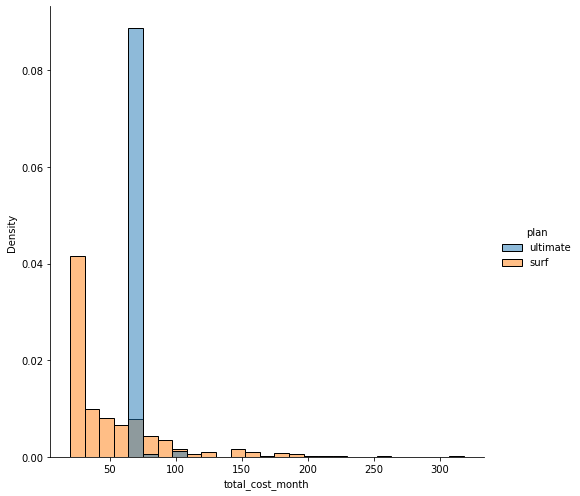

In [105]:
sns.displot(users_all, x="total_cost_month", hue="plan", stat="density", common_norm=False,height=7, aspect=1)

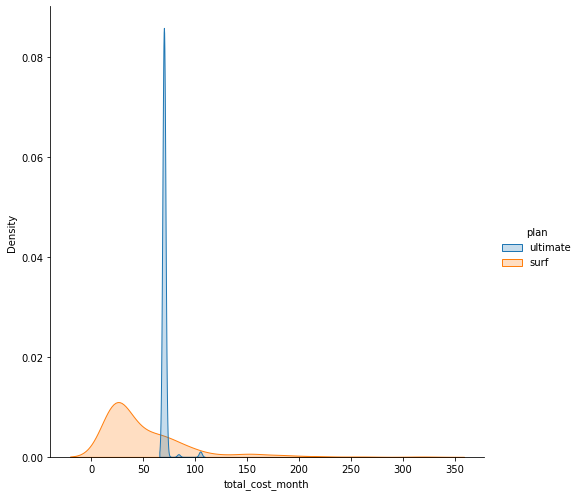

In [106]:
sns.displot(users_all, x="total_cost_month", hue="plan", kind="kde",fill=True, height=7, aspect=1)

plan
surf        AxesSubplot(0.125,0.125;0.775x0.755)
ultimate    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_cost_month, dtype: object

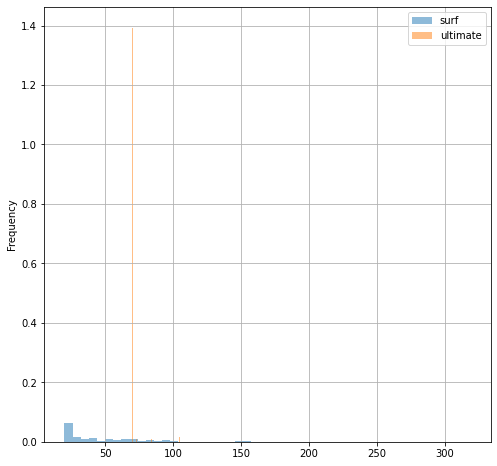

In [107]:
users_all.groupby('plan')['total_cost_month'].plot(kind='hist', grid=True,figsize=(8,8), legend=True, bins = 50, alpha=0.5, density=True)

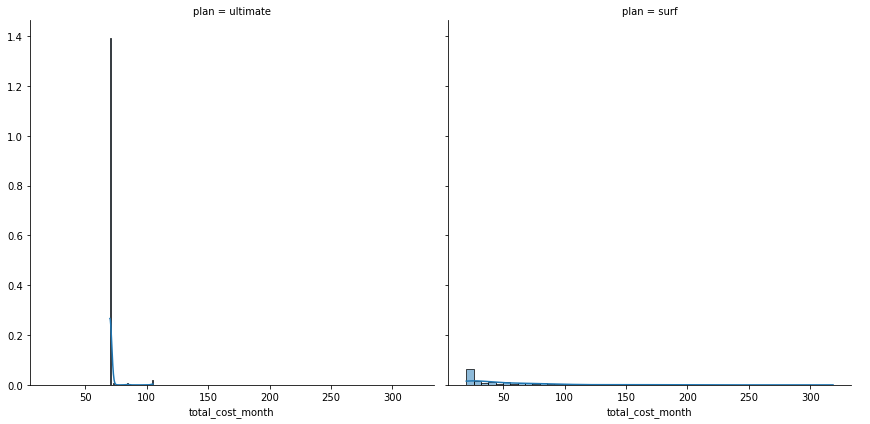

In [108]:
grafico = sns.FacetGrid(users_all, col="plan",height=6, aspect=1)
grafico.map(sns.histplot, "total_cost_month", kde=True, stat='density', bins = 50)
grafico.add_legend()

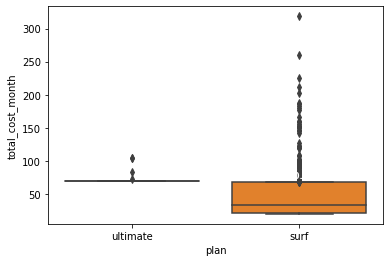

In [109]:
#Plotando grafico tipo boxplot para verificar outliers
box_plot = sns.boxplot(data=users_all, x='plan', y='total_cost_month', whis=[0.02, 0.98])
sns.set(rc={"figure.figsize":(10, 10)})

medians = users_all.groupby(['plan'])['total_cost_month'].median()
vertical_offset = users_all['total_cost_month'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
plt.show()

Nota-se, pelo gráfico que enquanto no plano 'Surf' há muitos usuários que excedem o limite de dados/mensagens/ligações e acabam pagando um valor acima do valor padrão do pacote, no plano 'Ultimate' isso raramente acontece, ou seja, os usuários geralmente uitilizam  dados/mensagens/ligações no limite do pacote.
Essas informações é possivel verificar também no boxplot, onde vê-se uma grande diferença entre os planos.

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Legal!

Tive a impressão de que aqui poderia ter um foco mensal no usuário também. Vi que você calculou o pagamento mensal dos 
usuários. Mas pode ser que um usuário excedeu em um mês, e em outro não.

Você levou o mês em consideração? Não identifiquei a coluna month.
</div>

<div class="alert alert-block alert-info">

<b>Oi Lara. Obrigado pela revisão e feedback. </b> <a class="tocSkip"></a>
    
Nesse caso, a verificação de consumo de internet, mensagens e chamadas dos usuários seria a media de todo o período? Ou seria mensalmente? 
Nos itens 2.1.4 (calls), 2.2.4(dados) e 2.3.4(mensagens) eu fiz o agrupamento por usuário e mês, agregando as calls (soma e contagem) <b>(calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id':'count'}))</b>
Caso seja mês a mês, não sei como fazer isso sem alterar drasticamente o projeto.  Pensei em aplicar o pd.get_dummies e transformar todas as linhas da coluna mês em colunas separadas. Mas com certeza essa não é a melhor opção e não sei se daria certo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 2)</b> <a class="tocSkip"></a>
    
Imagina, Alan.
    
Claro, posso te ajudar com a criação do gráfico.
    
Lá pra cima do notebook eu gerei uma cópia do seu df_calls para conseguir trabalhar em uma visão por mês.
    
Aqui abaixo, gerei um exemplo de gráfico considerando os meses.

Mas eu fiz isso somente para a duração total (sem considerar o plano). Teria que fazer o merge novamente entre os dados, e fazer isso para mais colunas. 
    
Realmente, para fazer uma nova abordagem teria uma mudança drástica do projeto.
    
Aqui podemos mexer tanto com as médias do período, ou duração total. Eu fiz com duração total só pra exemplificar.
    
    
Mas vou deixar de sugestão, abaixo para você.
    
Veja se deseja incorporar esses gráficos em sua análise.
    
Caso não ache necessário, fique tranquilo, seu projeto só teve uma abordagem diferente, não está errado, pode me re-enviar com uma resposta aqui, que o restante está todo ok.
    
O restante das correções está todo ok, falta só essa decisão para fecharmos o projeto.
    
    
Lara.
</div>

### Análise mensal da duração das ligações dos usuários por plano

Com o ojetivo de verificar o comportamento dos usuários ao longo dos meses, será feito uma análise mensal de duração das chamadas

In [110]:
def pivot_df(data, dt , vl, func):
    pivot = data.pivot_table(index=['user_id',data[dt].dt.month], values=vl, aggfunc= func)
    pivot = pivot.reset_index().rename(columns={dt : 'month'})
    return pivot

In [111]:
# O número de chamadas feitas por cada usuário por mês e a quantidade de minutos gastos por cada usuário por mês.
calls_month = pivot_df(calls_copy, 'call_date' , 'duration', ['count','sum'])
calls_month = calls_month.reset_index(drop=True).rename(columns={ 'duration': ''})
calls_month.reset_index(drop=True,inplace=True)

calls_month

,user_id,month,count,sum
,,,,
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0


In [112]:
#Inserindo a informação do tipo de plano de cada usuário

calls_month['plan'] = calls_month['user_id'].map(users.set_index('user_id')['plan'])
calls_month

,user_id,month,count,sum,plan
,,,,,
0,1000,12,16,124.0,ultimate
1,1001,8,27,182.0,surf
2,1001,9,49,315.0,surf
3,1001,10,65,393.0,surf
4,1001,11,64,426.0,surf
...,...,...,...,...,...
2253,1498,12,39,339.0,surf
2254,1499,9,41,346.0,surf
2255,1499,10,53,385.0,surf


In [113]:
#Somando a duração das ligações por mês
duracao_por_mes = calls_month.groupby(['month','plan'])['sum'].sum()

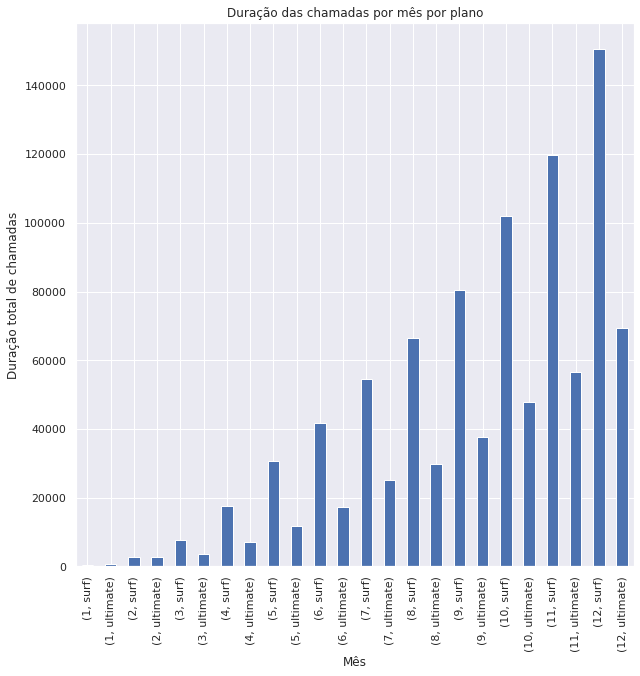

In [114]:
#Plotando o gráfico
duracao_por_mes.plot(kind='bar')
plt.title('Duração das chamadas por mês por plano')
plt.xlabel('Mês')
plt.ylabel('Duração total de chamadas')
plt.show();

Analisando  gráfico da soma total da duração das chamadas por mês separadas por plano, é possivel perceber uma linaridade crescente em ambos os planos, onde nota-se nitidamente que os usuários do plano 'Surf' têm chamadas com duração quase 2x mais longas do que os usuários do plano 'Ultimate'.

### Análise mensal de minutos das ligações dos usuários por plano

Verificando o comportamento dos usuários de cada plano quanto à duração das chamadas mensais

In [115]:
#Calculando a media, mediana, desvio padrão, variância, soma e contagem do custo total mensal dos usuários de cada plano
users_all_call_min = users_all.groupby(['plan']).agg({'call_duration_month':[np.mean,np.median,lambda x: np.std(x, ddof=0), lambda y: np.var(y, ddof=0),'sum','count']})
users_all_call_min.rename(columns = {'<lambda_0>':'std'}, inplace = True)
users_all_call_min.rename(columns = {'<lambda_1>':'var'}, inplace = True)
display(users_all_call_min)

call_duration_month                                                  \
                        mean median         std           var            sum   
plan                                                                           
surf              402.485951  391.0  205.758583  42336.594430  136442.737229   
ultimate          399.831985  414.0  205.740729  42329.247472   64372.949531   

                
         count  
plan            
surf       339  
ultimate   161

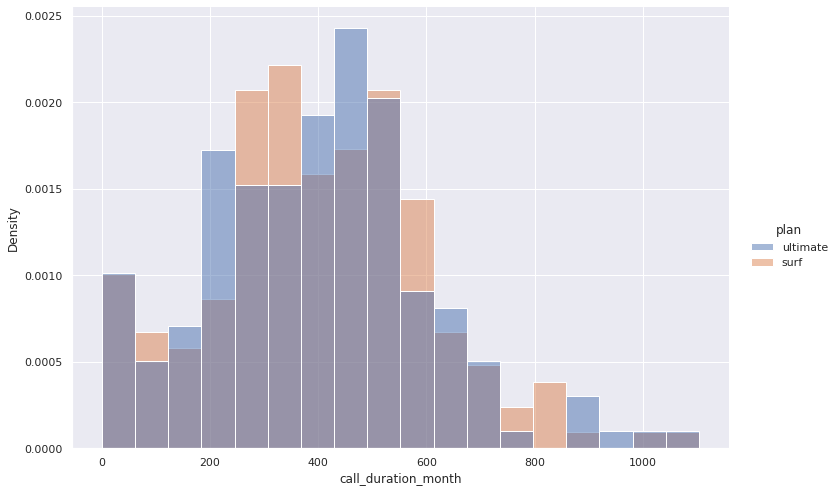

In [116]:
sns.displot(users_all, x="call_duration_month", hue="plan", stat="density", common_norm=False,height=7, aspect=1.5)

<div class="alert alert-block alert-danger">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Legal!

Essa visão não utiliza os meses em consideração, certo? Você conseguiria fazer um gráfico de barras, com a duração média do mês no eixo y, e os meses no eixo x?
</div>

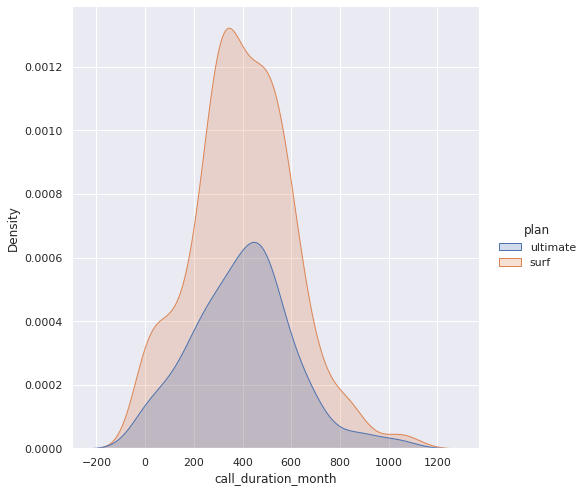

In [117]:
sns.displot(users_all, x="call_duration_month", hue="plan", kind="kde",fill=True, height=7, aspect=1)

plan
surf        AxesSubplot(0.125,0.125;0.775x0.755)
ultimate    AxesSubplot(0.125,0.125;0.775x0.755)
Name: call_duration_month, dtype: object

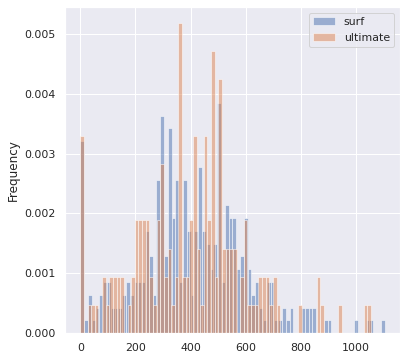

In [118]:
users_all.groupby('plan')['call_duration_month'].plot(kind='hist', grid=True,figsize=(6,6), legend=True, bins = 80, alpha=0.5, density=True)

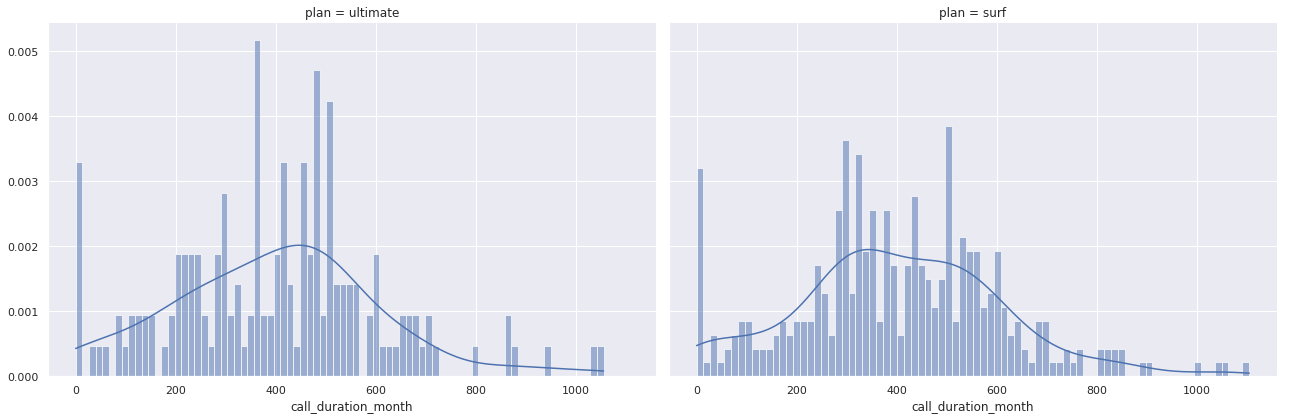

In [119]:
grafico = sns.FacetGrid(users_all, col="plan",height=6, aspect=1.5)
grafico.map(sns.histplot, "call_duration_month", kde=True, stat='density', bins = 80)
grafico.add_legend()

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
Também ficaria legal uma visão mensal com dados semelhantes.
</div>

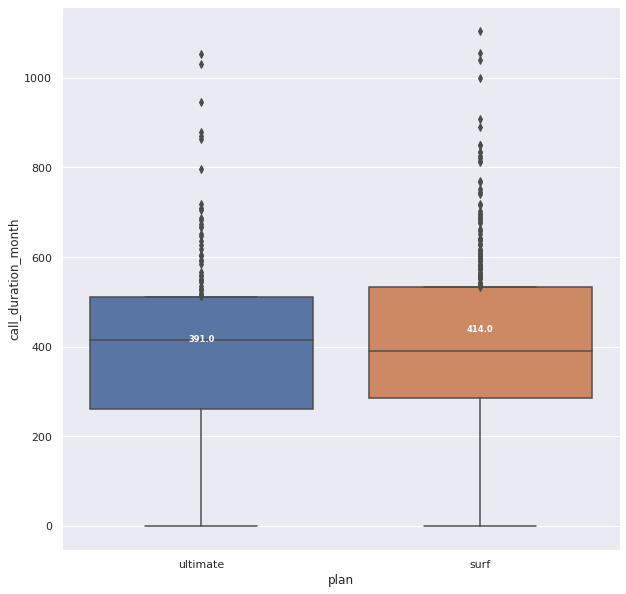

In [120]:
#Plotando grafico tipo boxplot para verificar outliers
box_plot = sns.boxplot(data=users_all, x='plan', y='call_duration_month', whis=[0.02, 0.98])
sns.set(rc={"figure.figsize":(10, 10)})

medians = users_all.groupby(['plan'])['call_duration_month'].median()
vertical_offset = users_all['call_duration_month'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
plt.show()

Verificando o comportamento dos usuários de cada plano quanto à quantidade das chamadas mensais

In [121]:
users_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   500 non-null    int64  
 1   name                      500 non-null    object 
 2   age                       500 non-null    int64  
 3   state_district            500 non-null    object 
 4   plan                      500 non-null    object 
 5   duration_plan_month       500 non-null    float64
 6   usd_monthly_pay           500 non-null    int64  
 7   minutes_included          500 non-null    int64  
 8   call_duration_month       500 non-null    float64
 9   calls_count               500 non-null    float64
 10  minutes_diff              500 non-null    float64
 11  usd_per_min               500 non-null    float64
 12  usd_min_exceed_month      500 non-null    float64
 13  gb_included               500 non-null    float64
 14  gb_month  

In [122]:
#Calculando a quantidade das chamadas mensais
users_all_call_count = users_all.groupby(['plan']).agg({'calls_count':[np.mean,np.median, lambda x: np.std(x, ddof=0), lambda y: np.var(y,ddof=0), 'sum', 'count']})
users_all_call_count.rename(columns = {'<lambda_0>':'std'}, inplace = True)
users_all_call_count.rename(columns = {'<lambda_1>':'var'}, inplace = True)
display(users_all_call_count)

calls_count                                                
                mean median         std           var      sum count
plan                                                                
surf      277.530973  212.0  239.860360  57532.992403  94083.0   339
ultimate  271.111801  191.0  239.335467  57281.465761  43649.0   161

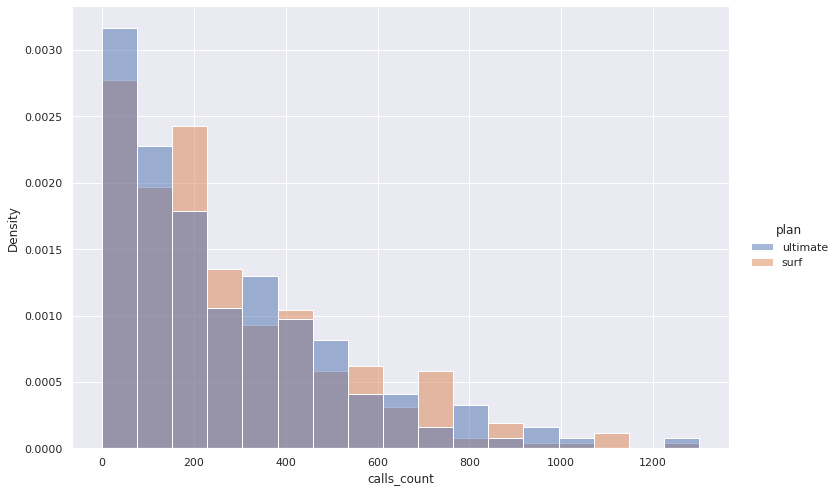

In [123]:
#sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False
sns.displot(users_all, x="calls_count", hue="plan", stat="density", common_norm=False,height=7, aspect=1.5)

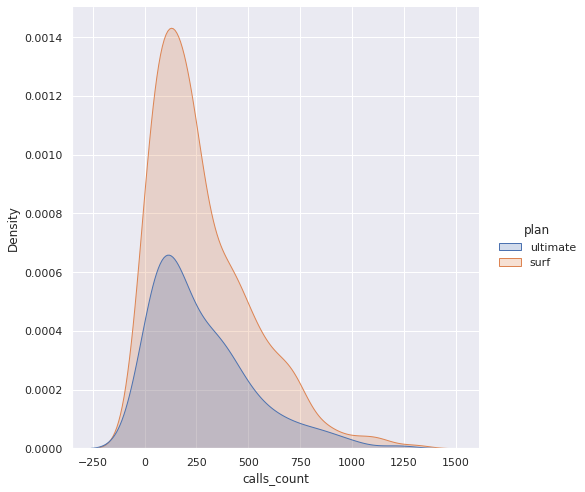

In [124]:
sns.displot(users_all, x="calls_count", hue="plan", kind="kde",fill=True, height=7, aspect=1,common_norm=True)

plan
surf        AxesSubplot(0.125,0.125;0.775x0.755)
ultimate    AxesSubplot(0.125,0.125;0.775x0.755)
Name: calls_count, dtype: object

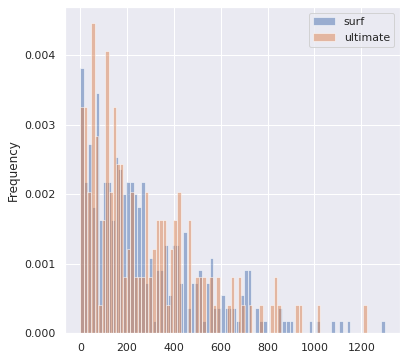

In [125]:
users_all.groupby('plan')['calls_count'].plot(kind='hist', grid=True, figsize=(6,6),legend=True, bins=80, alpha=0.5, density=True)

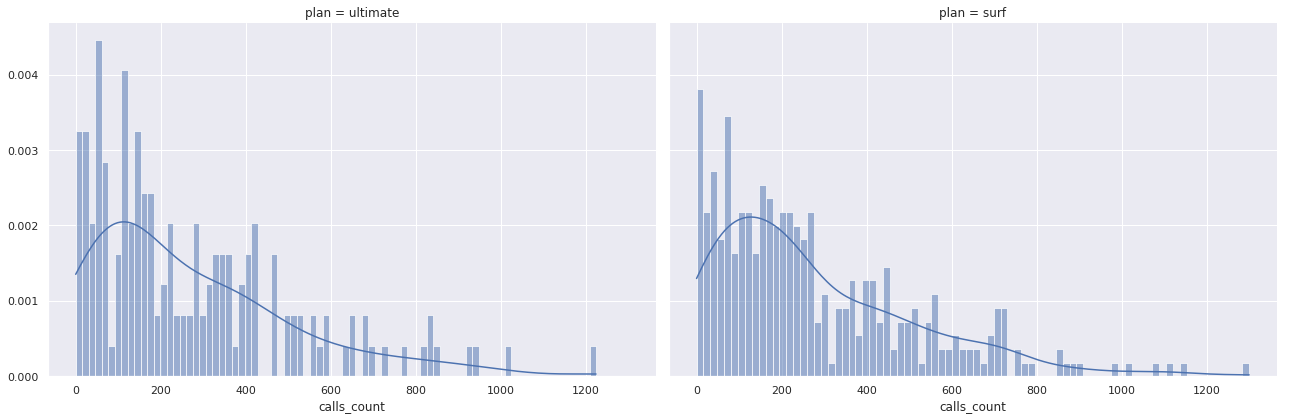

In [126]:
grafico = sns.FacetGrid(users_all, col="plan",height=6, aspect=1.5)
grafico.map(sns.histplot, "calls_count", kde=True, stat='density', bins = 80)
grafico.add_legend()

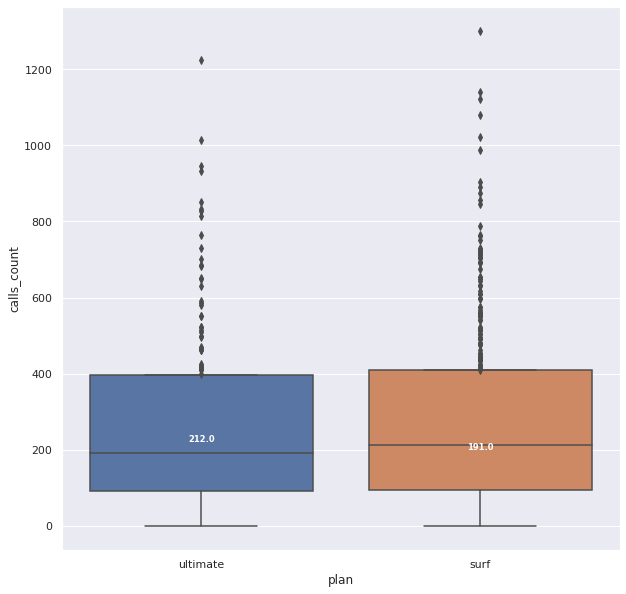

In [127]:
#Plotando grafico tipo boxplot para verificar outliers
box_plot = sns.boxplot(data=users_all, x='plan', y='calls_count', whis=[0.02, 0.98])
sns.set(rc={"figure.figsize":(10, 10)})

medians = users_all.groupby(['plan'])['calls_count'].median()
vertical_offset = users_all['calls_count'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
plt.show()

In [128]:
#Contando a quantidade de chamadas mensais dos usuários por plano
qt_por_mes = calls_month.groupby(['month','plan'])['count'].count()

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 3)</b> <a class="tocSkip"></a>
    
Alan,

Aqui uma versão do gráfico que adicionei abaixo que poderia te ajudar:
    
Note que você também poderia agrupar por mês e ano e o comportamento seria parecido.
</div>

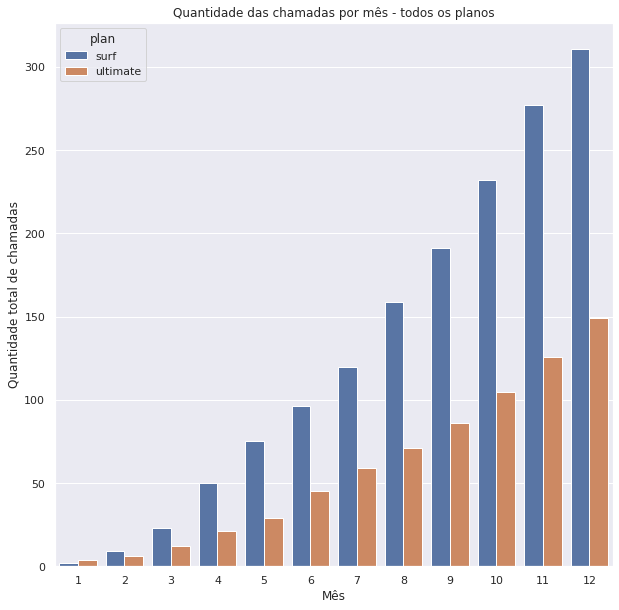

In [151]:
#código da revisora
temp_qtd_mes = qt_por_mes.reset_index()
sns.barplot(data = temp_qtd_mes, x='month', y='count', hue='plan')
plt.title('Quantidade das chamadas por mês - todos os planos')
plt.xlabel('Mês')
plt.ylabel('Quantidade total de chamadas')
plt.show();

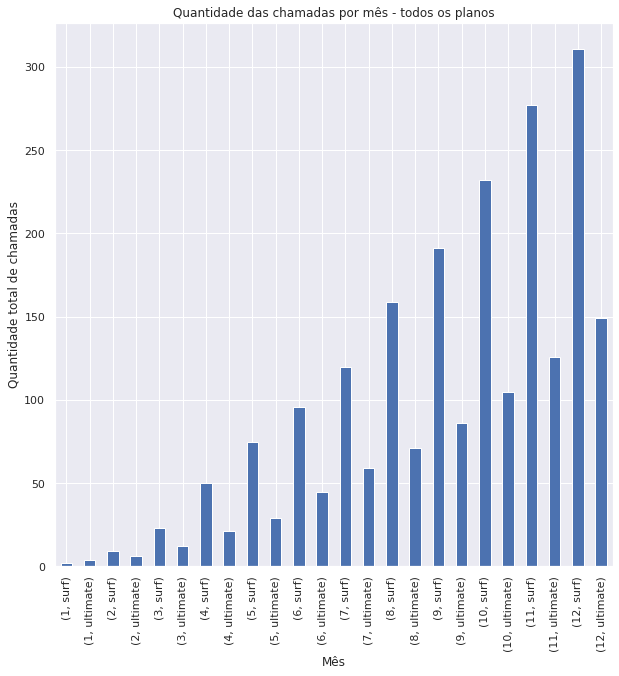

In [130]:
#Plotando o gráfico
qt_por_mes.plot(kind='bar')
plt.title('Quantidade das chamadas por mês - todos os planos')
plt.xlabel('Mês')
plt.ylabel('Quantidade total de chamadas')
plt.show();

Verificando o gráfico da soma total de chamadas por mês separadas por plano, o mesmo comportamento do gráfico anterior é notado aqui, ou seja, o comportamento linear crescente em ambos os planos. Também nota-se nitidamente que os usuários do plano 'Surf' ligam quase 2x mais do que os usuários do plano 'Ultimate'.

### Análise mensal do pacote de internet dos usuários por plano

In [131]:
#Inserindo a informação do tipo de plano de cada usuário
internet_copy['plan'] = internet_copy['user_id'].map(users.set_index('user_id')['plan'])
internet_copy

,user_id,month,mb_used,plan
0,1000,12,1901.47,ultimate
1,1001,8,6919.15,surf
2,1001,9,13314.82,surf
3,1001,10,22330.49,surf
4,1001,11,18504.30,surf
...,...,...,...,...
2272,1498,12,23137.69,surf
2273,1499,9,12984.76,surf
2274,1499,10,19492.43,surf
2275,1499,11,16813.83,surf


In [132]:
#Somando a quantidade de dados mensais dos usuários por plano
dados_por_mes = internet_copy.groupby(['month','plan'])['mb_used'].sum()

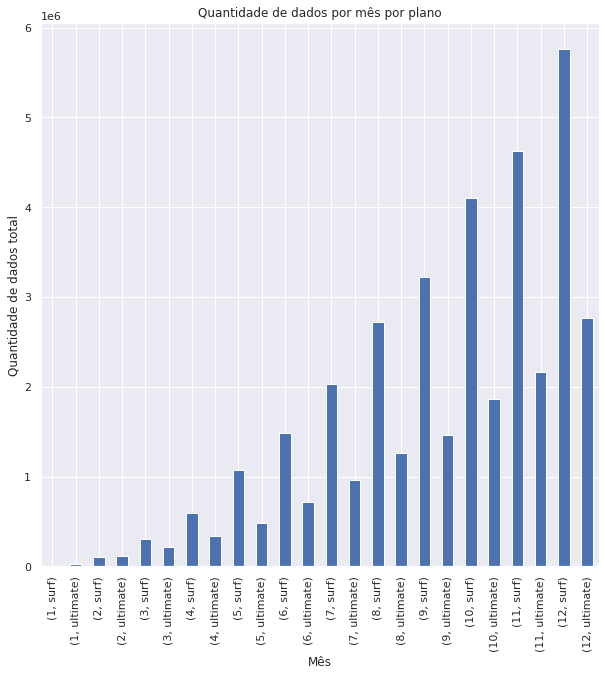

In [133]:
#Plotando o gráfico
dados_por_mes.plot(kind='bar')
plt.title('Quantidade de dados por mês por plano')
plt.xlabel('Mês')
plt.ylabel('Quantidade de dados total')
plt.show();

Aqui mais uma ez os usuários do plan 'Surf' se sobressaem em utilização de internet. Enquanto os usuários do plano 'Ultimate' têm sua utilização abaixo dos 3TB em dezembro, os usuários do plano 'Surf' quase chegam a 6TB de dados utilizados, ultrapassando o limite oferecido pelo plano em uma visão geral. 

### Análise mensal da quantidade de mensagens dos usuários por plano

In [134]:
#Inserindo a informação do tipo de plano de cada usuário
messages_copy['plan'] = messages_copy['user_id'].map(users.set_index('user_id')['plan'])
messages_copy

,user_id,month,messages_count,plan
0,1000,12,11,ultimate
1,1001,8,30,surf
2,1001,9,44,surf
3,1001,10,53,surf
4,1001,11,36,surf
...,...,...,...,...
1801,1496,9,21,surf
1802,1496,10,18,surf
1803,1496,11,13,surf
1804,1496,12,11,surf


In [135]:
#Somando a quantidade de mensagens mensais dos usuários por plano
messagens_por_mes = messages_copy.groupby(['month','plan'])['messages_count'].sum()

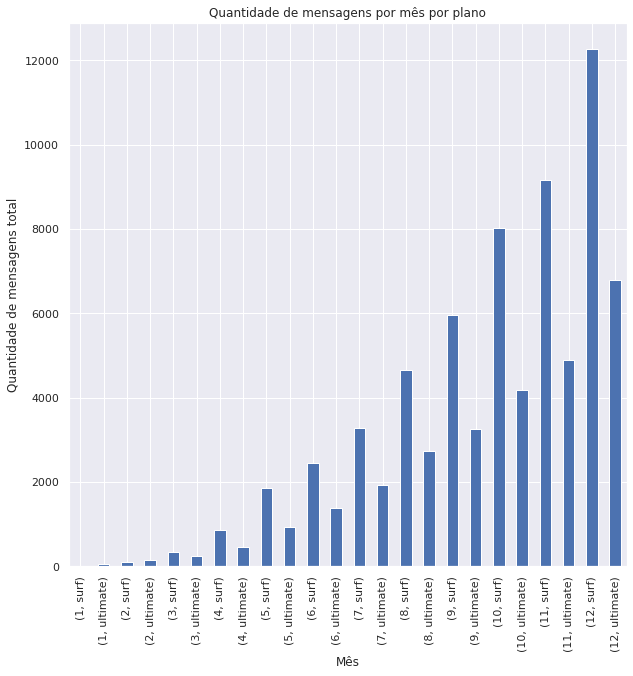

In [136]:
#Plotando o gráfico
messagens_por_mes.plot(kind='bar')
plt.title('Quantidade de mensagens por mês por plano')
plt.xlabel('Mês')
plt.ylabel('Quantidade de mensagens total')
plt.show();

O mesmo comportamento é percebido aqui. Aqui também percebe-se a superioridade dos usuários d plano 'Surf' sobre os usuáarios do plano 'Ultimate'frente a quantidade de mensagens por mês, onde também verifica-se um comportamento linear crescente dos usuários em relação a quantidade de mensagens.

## Teste das Hipóteses

Na estatística, hipótese ou teoria da decisão é difinida como qualquer afirmativa sobre uma medida numérica calculada a partir de uma amostra, como exemplo a média, variância, proporção, etc.

Segundo a literatura, o objetivo de um teste de hipóteses é “fornecer uma metodologia que nos permita verificar se os dados amostrais trazem evidências que apoiem ou não uma hipótese (estatística) formulada”, ou seja, nos auxilia a tomar decisões sobre uma ou mais populações baseado na informação obtida da amostra, associado a um risco máximo de erro. 

### Verificando a distribuição dos dados 

Será verificado se os dados são normalmente distribuídos. Para isso, será utilizado o teste  

In [137]:
#Filtrando o dataframe original (users_all) somente com os usuários do plano 'Surf' e 'Ultimate'
users_all_surf = users_all.loc[users_all['plan'] == 'surf']
users_all_ultimate = users_all.loc[users_all['plan'] == 'ultimate']

In [138]:
#Verificando a distribuição normal dos dados

def normality(data):
    test_stat_normality, p_value_normality = st.shapiro(data)
    print('p_value:', p_value_normality)
    if p_value_normality <0.05:
        print("Hipótese nula rejeitada. Os dados não são normalmente distribuídos.")
    else:
        print("Não é possível rejeitar a hipótese nula. Os dados são normalmente distribuídos.")   

normality(users_all_surf['total_cost_month'])
normality(users_all_ultimate['total_cost_month'])

p_value: 4.3292247871865825e-23
Hipótese nula rejeitada. Os dados não são normalmente distribuídos.
p_value: 6.0247529854884494e-27
Hipótese nula rejeitada. Os dados não são normalmente distribuídos.


Conforme verificado no deslocamento do gráfico e demonstrado acima, os dados  não seguem um modelo de distribuição normal. Para a análise em questão, será considerado uma distribuição normal dos dados.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
Sucesso.
</div>

#### Testando Hipótese 1

Existem dois tipos de hipóteses que são testados: a hipótese nula (H0) e a hipótese alternativa (H1). A hipótese nula geralmente é a hipótese padrão que assume qua não há diferença significativa entre as amostras e a hipótese alternativa é a hipótese que assume que existe diferença entre as amostras. 

A hipótese 1 (que queremos testar) afirma que a receita media dos usuários dos planos 'Ultimate' e 'Surf' são diferentes. Portanto:

   - H0(nula): mi(s) = mi(u)              - receita media dos planos iguais
   - H1(alternativa): mi(s) != mi(u)      - receita media dos planos diferente
   
Em um teste de hipótese, parte-se do pressuposto que a hipótese H0(nula) é verdadeira, ou seja, a receita média dos usuários dos planos são iguais. Como se quer testar diferença entre as amostras, iremos aplicar o teste bilateral TipoT.

In [139]:
alpha = 0.05

results = st.ttest_ind(users_all_surf['total_cost_month'], users_all_ultimate['total_cost_month'], equal_var = False)

print('p-value:', results.pvalue)


if results.pvalue < alpha:    
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 1.5132711002682725e-14
Nós rejeitamos a hipótese nula


Conforme valor encontrado em p-value, há indícios de que as médias dos planos 'Surf' e 'Ultimate' sejam diferentes.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
Sucesso.
</div>

#### Testando a Hipótese 2

A hipótese 2 afirma que a receita media dos usuários da área de NY-NJ é diferente da receita das demais áreas. Portanto:
        
   - H0(nula): mi(s) = mi(u)              - receita media da região de NY_NJ igual
   - H1(alternativa): mi(s) != mi(u)      - receita media da região diferente

In [140]:
#Filtrando o dataframe original (users_all) somente com os usuários da região 'NY-NJ'
users_all_NYNJ = users_all.loc[users_all['state_district'] == 'NY-NJ-PA']
users_all_others = users_all.loc[users_all['state_district'] != 'NY-NJ-PA']

In [141]:
users_all_NYNJ.head()

,user_id,name,age,state_district,plan,duration_plan_month,usd_monthly_pay,minutes_included,call_duration_month,calls_count,...,gb_month,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_included,messages_count,messages_diff,usd_per_message,usd_message_exceed_month,total_cost_month
14,1014,Edmundo Simon,61,NY-NJ-PA,surf,2.0,20,500,638.500000,178.0,...,5.0,0.0,10,0.0,50,73.0,23.0,0.03,0.69,24.84500
22,1022,Bo Snow,73,NY-NJ-PA,surf,6.0,20,500,508.125000,568.0,...,17.0,2.0,10,20.0,50,0.0,0.0,0.03,0.00,40.24375
24,1024,Yuki Tyson,74,NY-NJ-PA,surf,5.0,20,500,564.000000,80.0,...,11.0,0.0,10,0.0,50,0.0,0.0,0.03,0.00,21.92000
27,1027,Georgeanna Cardenas,38,NY-NJ-PA,surf,7.0,20,500,357.166667,306.0,...,15.0,0.0,10,0.0,50,78.0,28.0,0.03,0.84,20.84000
31,1031,Lane Martin,52,NY-NJ-PA,ultimate,6.0,70,3000,491.166667,408.0,...,16.0,0.0,7,0.0,1000,14.0,0.0,0.01,0.00,70.00000


In [142]:
users_all_others.head()

,user_id,name,age,state_district,plan,duration_plan_month,usd_monthly_pay,minutes_included,call_duration_month,calls_count,...,gb_month,gb_diff,usd_per_gb,usd_gb_exceed_month,messages_included,messages_count,messages_diff,usd_per_message,usd_message_exceed_month,total_cost_month
0,1000,Anamaria Bauer,45,GA,ultimate,1.0,70,3000,124.000000,16.0,...,2.0,0.0,7,0.0,1000,11.0,0.0,0.01,0.00,70.00
1,1001,Mickey Wilkerson,28,WA,surf,5.0,20,500,345.600000,261.0,...,16.0,1.0,10,10.0,50,207.0,157.0,0.03,4.71,34.71
2,1002,Carlee Hoffman,36,NV,surf,3.0,20,500,276.333333,113.0,...,14.0,0.0,10,0.0,50,88.0,38.0,0.03,1.14,21.14
3,1003,Reynaldo Jenkins,52,OK,surf,12.0,20,500,1104.000000,149.0,...,27.0,12.0,10,120.0,50,50.0,0.0,0.03,0.00,158.12
4,1004,Leonila Thompson,40,WA,surf,8.0,20,500,346.500000,370.0,...,20.0,5.0,10,50.0,50,177.0,127.0,0.03,3.81,73.81


In [143]:
alpha = 0.05

results = st.ttest_ind(users_all_NYNJ['total_cost_month'], users_all_others['total_cost_month'], equal_var = False)

print('p-value:', results.pvalue)


if results.pvalue < alpha:    
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 0.39197635796713404
Nós não podemos rejeitar a hipótese nula


Conforme valor encontrado em p-value, não há indícios de que as médias da região NY-NJ sejam diferentes das demais regiões.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
Sucesso.
</div>

## Conclusão

O Objetivo da análise é determinar quais dos planos ('Surf' ou 'Ultimate') são mais rentáveis afim de ajustar o investimento em publicidade.

No capitulo 1 foi carregado as bases de dados e bibliotecas que seriam utilizadas na análise.

No capítulo 2 foi verificado nos conjuntos de dados:
  - os valores ausentes
  - correção do tipo de dado
  - eliminação das linhas com valor 0 
  - criado uma coluna somente com o estado/distrito dos usuários.
  - calculado quantidade de mensagens por usuários por mês
  - calculado quantidade de dados utilizado pr usuário por mês
  - calculado quantidade e duração das chamadas por usuário por mês

No capítulo 3 iniciou-se a junção dos conjuntos de dados e criação de uma base única (users_all) com as informações de utilização de mensagens e duração e quantidade de ligações, bem como o valor excedente pago por cada serviço pelo usuário.

No capítulo 4 gerou-se alguns gráficos do valor total pago por cada usuário de cada plano bem como feito algumas observações. No geral verifica-se que os usuários do plano 'Surf' excedem o limite dos serviços oferecidos muito mais do que os usuários do plano 'Ultimate', ou seja, são usuários que geralmente têm uma despesa variável muito maior do que os usuários do plano 'Ultimate'. Também foi gerado gráficos dos minutos utilizados pelos usuários aifm de analisar a diferença entre os planos.

Ao longo da análise, percebeu-se a necessidade de verificar o consumo mensal dos usuários quanto ao serviço de internet, mensagens e chamadas. Pelos gráficos plotados, é possivel verificar uma nítida alteração no comportamento dos usuários em geral, tanto no plano 'Surf' como no plano 'Ultimate', chegando a patamares 10x maiores (DEZ) em relação aos 2 primeiros meses (JAN e FEV)

No capítulo 5 fez-se o teste das hipóteses oferecidas para análise:
     
   - Hipótese 1: a receita media dos usuários dos planos 'Ultimate' e 'Surf' são diferentes. Verificou-se pelo teste de hipóteses o que os cálculos mostraram: não há evidências para sustentar essa afirmação. Ou seja, pensando na população total de usuários, pode-se inferir que a receita médias dos planos realmente seja diferente.
   - Hipótese 2:  a receita media dos usuários da área de NY-NJ é diferente da receita das demais áreas. També verificou-se pelos testes que não há indícios de que a receita da região de NY-NJ seja diferente das demais regiões.

Tendo como premissa um insight do mercado de marketing de que conquistar um novo cliente custa  de 5 a 7x mais do que manter um atual, é possivel que o plano 'Ultimate' seja mais rentável que o plano 'Surf' pelas seguintes razões:

   - a receita fixa do plano 'ultimate' é maior (independente de utilização do serviço ou não pelo usuário)
   - tem-se uma receita fixa maior mesmo com uma quantidade de clientes menor (custo/cliente mais rentável)
   - quantidade de clientes do plano 'Ultimate' menor, tem-se margem pra crescimento de mercado nesse nicho.
   
Pesa contra o plano 'Surf' a questão custo/cliente ser menor, ou seja, é necessário muitos clientes (e, por consequência, uma estrutura pra atender esses clientes também maior). O valor agregado de um cliente 'Ultimate' é muito maior do que os usuários do plano 'Surf'.

Em relação ao comportamento dos usuários verificado nos gráficos,uma estratégia de negócio seria particionar a estratégia de marketing: nos 6 primeiros meses do ano investir mais em marketing voltado para o público 'Ultimate' que pssui um retorno fixo maior independente do consumo dos usuários e, a partir de MAIO/JUNHO iniciar uma campanha voltada para o público do plano 'Surf' onde, devido ao excedente de utilização nos últimos meses do ano, será um excelente retorno. 

Isso posto, acredita-se que o retorno de um investimento em um marketing voltado para o plano 'Ultimate' seria mais vantajoso anualmente em termos de rentabilidade do que o plano 'Surf'. 

Afim de enxergar mais vantagens e retornos mais promissores no plano 'Ultimate', seria interessante, em um momento oportuno, categorizar os usuários por idade e desenvolver as mesmas análises aqui descritas.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
Sucesso nas conclusões.
</div>

<div class="alert alert-block alert-success">
<b>Comentário Final da Revisora v1</b> <a class="tocSkip"></a>
    
    
Alan, parabéns pelo seu trabalho!

Sua análise ficou excelente. 

Adicionei comentários em amarelo para contribuir e em vermelho, pedindo alguns ajustes.

São pedidos relacionados a ver o gasto mensal do usuário.
    
Aguardo seu retorno para finalizarmos a revisão,
    
Lara.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora (Revisão 2)</b> <a class="tocSkip"></a>
    
Alan,

Respondi sua dúvida mais acima.

Me diga o que acha. Aguardo seu retorno para prosseguir.

Obrigada,
    
Lara
</div>

<div class="alert alert-block alert-success">
<b>Comentário Final da Revisora (Revisão 3)</b> <a class="tocSkip"></a>
    
Alan,

Parabéns pelos ajustes!

Adicionei só mais uma sugestão em amarelo com uma dica para melhorar o gráfico que fez.
    
Os ajustes ficaram ótimos.
    
Desejo sucesso em sua jornada,
    
Lara
</div>